# Exploring Job Postings data: Unveiling Patterns and Trends

In [1]:
# Importing necessary libraries for data analysis and visualization. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import json 

In [2]:
# Loading CSV file into df variable. 

df = pd.read_csv(r"C:\Users\rohit\Downloads\job_descriptions.csv") 

In [3]:
# Displaying the first few rows of the DataFrame df. 

df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [4]:
# Retrieve the shape of the DataFrame. 

df.shape

(1615940, 23)

In [5]:
# Getting detailed information about the DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

In [6]:
# Checking the number of missing values in each column of the df. (some Nan values present in 'Company Profile' column)

df.isnull().sum() 

Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64

In [7]:
# Checking the number of duplicated rows in the df. (there is no dupliactes in the dataframe)

df.duplicated().sum()

0

In [8]:
# Dropping unnecessary columns which will not help in the data analysis process. 

df.drop(columns=['Job Id','location','latitude','longitude','Contact Person','Contact','Job Description','Benefits','skills','Responsibilities','Company Size'], axis=1, inplace=True)

In [9]:
# Dropping rows with missing values in the df. 

df.dropna(inplace=True)

In [10]:
# Converting 'Job Posting Date' column to datetime datatype, which is present in object datatype. 

df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date']) 

In [11]:
# Splitting 'Experience' column into two separate columns.
# Extracting numbers from the string using regular expressions.  

df[['Min_Exp_Req','Max_Exp_Req']] = df['Experience'].str.extract(r'(\d+) to (\d+) Years') 

In [12]:
# Converting the new columns to integer type for further analysis. 

df['Min_Exp_Req'] = df['Min_Exp_Req'].astype(int)
df['Max_Exp_Req'] = df['Max_Exp_Req'].astype(int)

In [13]:
# Splitting the 'Salary Range' column into two separate columns for minimum and maximum salary. 

df[['Min_Salary','Max_Salary']] = df['Salary Range'].str.extract(r'\$(\d+)K-\$(\d+)K') 

In [14]:
# Converting the extracted values to integers for further analysis. 

df['Min_Salary'] = df['Min_Salary'].astype(int)
df['Max_Salary'] = df['Max_Salary'].astype(int) 

In [15]:
# Preprocessing the 'Company Profile' column to handle parsing issues caused by double quotes in CEO's name.
# Replacing the problematic substring '"Duke"' with '\\"Duke\\"' to ensure proper parsing using json.loads(). 

df['Company Profile'] = [x.replace('"Duke"', '\\"Duke\\"') for x in df['Company Profile']]  

In [16]:
# Extracting the 'Sector' field from each JSON string in the 'Company Profile' column
# and creating a new column named 'Sector' to store the extracted values. 

df['Sector'] = df['Company Profile'].apply(lambda x: json.loads(x)['Sector'])

# Extracting the 'Industry' field from each JSON string in the 'Company Profile' column
# and creating a new column named 'Industry' to store the extracted values.

df['Industry'] = df['Company Profile'].apply(lambda x: json.loads(x)['Industry']) 

In [17]:
# Dropping some columns from the DataFrame since the needed data has been extracted.

df.drop(columns=['Company Profile','Experience','Salary Range'], axis=1, inplace=True) 

In [18]:
# Retrieving the names of the remaining columns in the dataset after dataset preprocessing. 

df.columns 

Index(['Qualifications', 'Country', 'Work Type', 'Job Posting Date',
       'Preference', 'Job Title', 'Role', 'Job Portal', 'Company',
       'Min_Exp_Req', 'Max_Exp_Req', 'Min_Salary', 'Max_Salary', 'Sector',
       'Industry'],
      dtype='object')

In [19]:
# Rearranging columns for better understanding of each feature during analysis. 

column_order = ['Sector','Industry','Company','Job Title','Role','Job Portal','Job Posting Date','Country','Work Type',
 'Qualifications','Min_Exp_Req','Max_Exp_Req','Min_Salary','Max_Salary','Preference'] 

df = df[column_order] 

In [20]:
# Overview of preprocessed dataframe. 

df.sample(4)

,Sector,Industry,Company,Job Title,Role,Job Portal,Job Posting Date,Country,Work Type,Qualifications,Min_Exp_Req,Max_Exp_Req,Min_Salary,Max_Salary,Preference
405963,Automotive,Motor Vehicles & Parts,Tesla,Office Manager,Administrative Manager,Jobs2Careers,2021-09-23,Estonia,Part-Time,M.Com,5,15,60,102,Male
247132,Food & Confectionery,Food Consumer Products,Hershey,Nurse Manager,Nurse Educator,Idealist,2023-06-06,Pakistan,Intern,MCA,0,15,65,101,Male
271473,Telecommunications,Telecommunications,Lumen Technologies,Graphic Designer,UI/UX Designer,CareerBuilder,2022-08-20,"Micronesia, Fed. Sts.",Temporary,PhD,0,14,64,95,Both
477530,Insurance,Diversified Financials,Marsh & McLennan,Project Coordinator,Construction Project Coordinator,Snagajob,2021-10-24,Mexico,Contract,MBA,5,11,58,101,Male


In [21]:
# Dataset information. 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610462 entries, 0 to 1615939
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Sector            1610462 non-null  object        
 1   Industry          1610462 non-null  object        
 2   Company           1610462 non-null  object        
 3   Job Title         1610462 non-null  object        
 4   Role              1610462 non-null  object        
 5   Job Portal        1610462 non-null  object        
 6   Job Posting Date  1610462 non-null  datetime64[ns]
 7   Country           1610462 non-null  object        
 8   Work Type         1610462 non-null  object        
 9   Qualifications    1610462 non-null  object        
 10  Min_Exp_Req       1610462 non-null  int32         
 11  Max_Exp_Req       1610462 non-null  int32         
 12  Min_Salary        1610462 non-null  int32         
 13  Max_Salary        1610462 non-null  int32 

In [22]:
# Shape of the dataset after preprocessing.  

df.shape

(1610462, 15)

Here's a concise description of each column: 

- Sector: Broad industry category.
- Industry: Specific field within the sector.
- Company: Name of the hiring organization.
- Job Title: Title of the job position.
- Role: Responsibilities associated with the job.
- Job Portal: Platform where the job is listed.
- Job Posting Date: Date the job was posted.
- Country: Location of the job.
- Work Type: Type of employment (full-time, part-time, etc.).
- Qualifications: Required qualifications.
- Min_Exp_Req: Minimum experience required.
- Max_Exp_Req: Maximum experience required.
- Min_Salary: Minimum salary offered.
- Max_Salary: Maximum salary offered.
- Preference: Preferences for job (male, female, both). 

In [23]:
# Calculating the minimum and maximum dates from the 'Job Posting Date' column.

min_date = df['Job Posting Date'].min()
max_date = df['Job Posting Date'].max()

# Date range to gain insights about the data, such as the period during which jobs were posted. 

print("\033[1m", "Date Range:", min_date, "to", max_date) 

 Date Range: 2021-09-15 00:00:00 to 2023-09-15 00:00:00


Based on the date range of job postings from September 15, 2021, to September 15, 2023, it can be inferred that all analysis and insights are derived from a two-year period.  

In [24]:
# Finding total number of sectos. 

val = len(df['Sector'].value_counts().index.tolist())

print("\033[1m", 'Total number of sectors :', val)

 Total number of sectors : 204


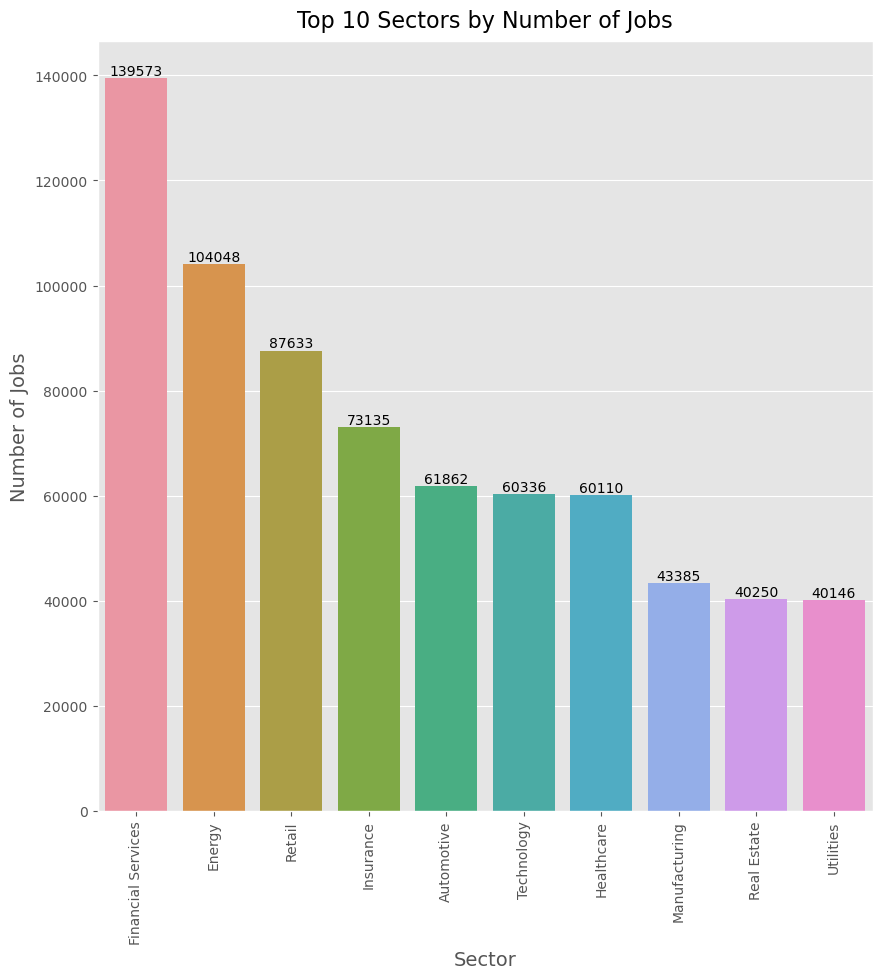

In [25]:
# Extracting the top 10 sectors by the number of jobs and storing the result in temp_df. 

temp_df = df['Sector'].value_counts().sort_values(ascending=False).reset_index().head(10)
temp_df.rename(columns={'index':'Sector_Name','Sector':'Number_of_Jobs'}, inplace=True) 

# Creating a bar plot using seaborn for 'Top 10 Sectors by Number of Jobs'. 

plt.style.use('ggplot')

plt.figure(figsize=(10,10))

graph = sns.barplot(data=temp_df, x='Sector_Name', y='Number_of_Jobs') 

for val in graph.containers:
    
    graph.bar_label(val) 

plt.title('Top 10 Sectors by Number of Jobs', fontsize=16, pad=10)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()   

In [26]:
# Calculating the percentage of jobs provided by the top sectors.  

Finance = round((temp_df['Number_of_Jobs'][0])/(df.shape[0])*100, 2)
Energy = round((temp_df['Number_of_Jobs'][1])/(df.shape[0])*100, 2)
Retail = round((temp_df['Number_of_Jobs'][3])/(df.shape[0])*100, 2)
Insurance = round((temp_df['Number_of_Jobs'][4])/(df.shape[0])*100, 2) 

print("\033[1m", 'Approximately', Finance, 'percent of the total jobs are in the Finance sector.') 
print("\033[1m", 'Approximately', Energy, 'percent of the total jobs are in the Energy sector.') 
print("\033[1m", 'Approximately', Retail, 'percent of the total jobs are in the Retail sector.') 
print("\033[1m", 'Approximately', Insurance, 'percent of the total jobs are in the Insurance sector.')  

 Approximately 8.67 percent of the total jobs are in the Finance sector.
 Approximately 6.46 percent of the total jobs are in the Energy sector.
 Approximately 4.54 percent of the total jobs are in the Retail sector.
 Approximately 3.84 percent of the total jobs are in the Insurance sector.


The analysis of the top 10 sectors by job openings reveals a varied landscape of employment opportunities. Financial Services emerges as the primary contributor with 139,573 job openings, followed closely by the Energy sector with 104,048 openings. Retail and Insurance sectors also feature prominently, offering 87,633 and 73,135 job opportunities, respectively. These sectors collectively represent a significant portion of the job market, with Financial Services alone accounting for approximately 8.67% of total job openings. The findings underscore the diversity and competitiveness of the employment landscape, highlighting key sectors driving employment trends and opportunities within the dataset. 

In [27]:
# Creating a DataFrame for counting the number of industries and companies under each sector. 

sector_list = df['Sector'].value_counts().index.tolist()

industry_list = [] 
comapny_list = []

for val in sector_list:
    
    val1 = len(df[df['Sector']==val]['Industry'].value_counts().index.tolist())
    val2 = len(df[df['Sector']==val]['Company'].value_counts().index.tolist()) 
    
    industry_list.append(val1)
    comapny_list.append(val2) 

Sector_df = pd.DataFrame({'Sector_Name': sector_list, 'Industry_Count': industry_list, 'Company_Count': comapny_list})  

Sector_df 

,Sector_Name,Industry_Count,Company_Count
0,Financial Services,13,77
1,Energy,12,57
2,Retail,16,48
3,Insurance,8,40
4,Automotive,6,34
...,...,...,...
199,Healthcare/Hospitals,1,1
200,Beverage/Alcohol,1,1
201,Chemicals and Energy,1,1
202,Manufacturing/Building Systems,1,1


In [28]:
# Finding the top five sectors under which the most number of industries lie.

temp_df = Sector_df.sort_values(by='Industry_Count', ascending=False)
temp_df = temp_df[['Sector_Name', 'Industry_Count']]

print('These are the top five sectors under which the most number of industries come:')
temp_df.head()   

These are the top five sectors under which the most number of industries come:


,Sector_Name,Industry_Count
2,Retail,16
7,Manufacturing,14
0,Financial Services,13
1,Energy,12
5,Technology,9


In [29]:
# Finding the top five sectors under which the most number of companies lie. 

temp_df = Sector_df.sort_values(by='Company_Count', ascending=False)
temp_df = temp_df[['Sector_Name','Company_Count']]

print('These are the top five sectors under which the most number of companies come:')
temp_df.head()   

These are the top five sectors under which the most number of companies come:


,Sector_Name,Company_Count
0,Financial Services,77
1,Energy,57
2,Retail,48
3,Insurance,40
4,Automotive,34


In [30]:
# Finding total number of industries. 

val = len(df['Industry'].value_counts().index.tolist())

print("\033[1m", 'Total number of industries :', val)  

 Total number of industries : 204


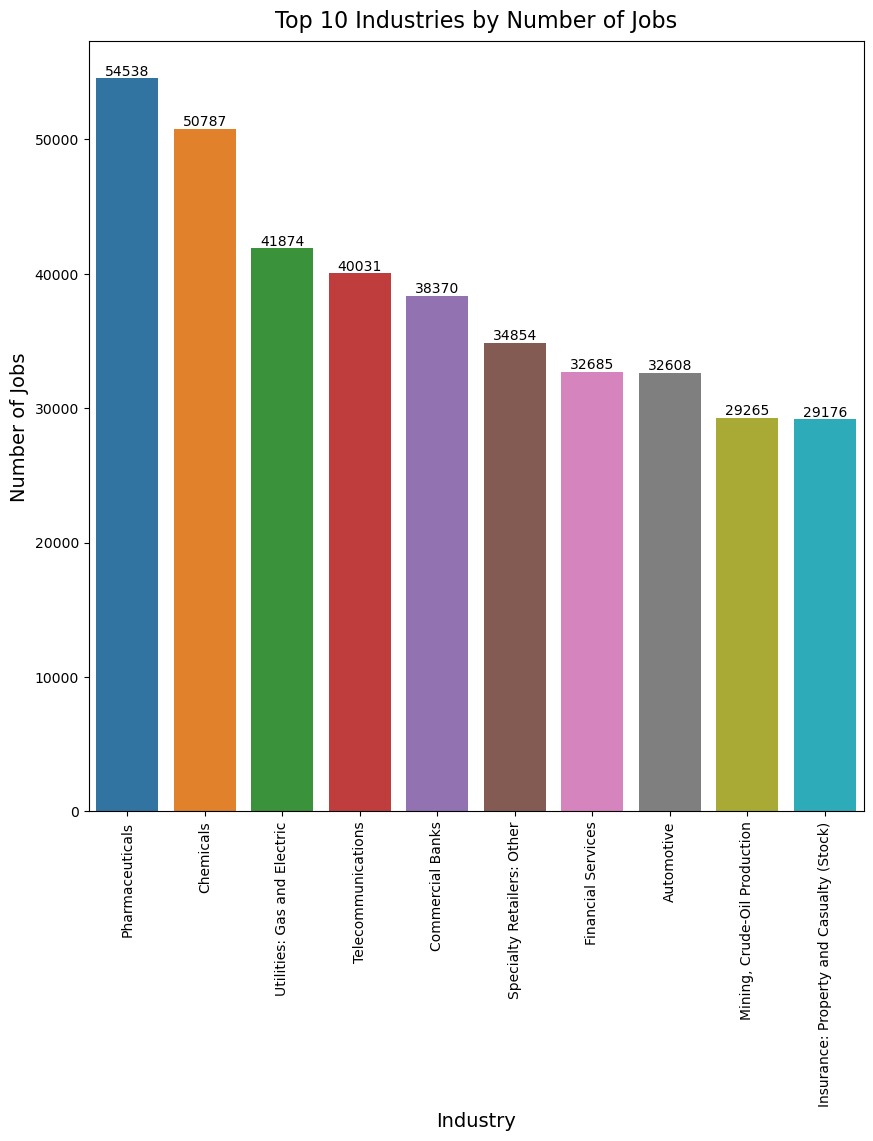

In [31]:
# Extracting the top 10 Industries by the number of jobs and storing the result in temp_df. 

temp_df = df['Industry'].value_counts().sort_values(ascending=False).reset_index().head(10)
temp_df.rename(columns={'index':'Industry_Name','Industry':'Number_of_Jobs'}, inplace=True) 

# Creating a bar plot using seaborn for 'Top 10 Industries by Number of Jobs'. 

plt.style.use('default')

plt.figure(figsize=(10,10))

graph = sns.barplot(data=temp_df, x='Industry_Name', y='Number_of_Jobs') 

for val in graph.containers:
    
    graph.bar_label(val) 

plt.title('Top 10 Industries by Number of Jobs', fontsize=16, pad=10)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()    

In examining the top 10 industries by job openings, it's evident that the employment landscape is diverse. Pharmaceuticals and Chemicals lead with 54,538 and 50,787 job openings, respectively. Utilities: Gas and Electric and Telecommunications sectors follow closely, offering substantial opportunities. Commercial Banks also feature prominently.

In [32]:
# Creating a dataFrame to find industries that comes under the most number of sectors. 

industry_list = df['Industry'].value_counts().index.tolist()

sectors_list = [] 

for val in industry_list:
    
    sectors_list.append(len(df[df['Industry']==val]['Sector'].value_counts().index.tolist())) 

Industry_df = pd.DataFrame({'Industry_Name':industry_list,'Sectors_Count':sectors_list}) 

Industry_df

,Industry_Name,Sectors_Count
0,Pharmaceuticals,3
1,Chemicals,12
2,Utilities: Gas and Electric,2
3,Telecommunications,2
4,Commercial Banks,4
...,...,...
199,Business Services - Data/Analytics,1
200,Food and Beverage - Alcoholic Beverages,1
201,Cement and Chemicals,1
202,Manufacturing/Building Systems,1


In [33]:
# Finding the top five most versatile industries that come under multiple sectors.

print('These are top five most versatile industries: ')
Industry_df.sort_values(by='Sectors_Count', ascending=False).head()

These are top five most versatile industries: 


,Industry_Name,Sectors_Count
1,Chemicals,12
16,Wholesalers: Diversified,10
26,Industrial Machinery,7
5,Specialty Retailers: Other,7
19,Food Consumer Products,5


In [34]:
# Finding the top ten sectors and industries under which the most number of companies lie.

temp_df = df.groupby(['Sector','Industry'])['Company'].count().reset_index()

print('These are top sectors and industries under which the most number of companies lie:') 
temp_df.sort_values(by='Company', ascending=False).head(10)  

These are top sectors and industries under which the most number of companies lie:


,Sector,Industry,Company
355,Telecommunications,Telecommunications,38134
283,Pharmaceuticals,Pharmaceuticals,34505
135,Financial Services,Commercial Banks,31075
21,Automotive,Automotive,30833
382,Utilities,Utilities: Gas and Electric,29184
55,Chemicals,Chemicals,27272
106,Energy,"Mining, Crude-Oil Production",25672
138,Financial Services,Financial Services,25386
316,Retail,Specialty Retailers: Other,22105
110,Energy,Pipelines,20125


In [35]:
# Finding total number of companies. 

val = len(df['Company'].value_counts().index.tolist())

print("\033[1m", 'Total number of industries :', val)   

 Total number of industries : 885


In [36]:
# Printing the companies with the most and least number of jobs.  

print("\033[1m", df['Company'].value_counts().sort_values(ascending=False).head(1))
print("\033[1m", df['Company'].value_counts().sort_values(ascending=False).tail(1))  

 DTE Energy    1957
Name: Company, dtype: int64
 Siemens AG    1678
Name: Company, dtype: int64


Based on the data, it appears that there isn't a significant difference between the company with the most job openings, DTE Energy, which has 1957 job openings, and the company with the least job openings, Siemens AG, which has 1678 job openings. Considering there are a total of 885 companies, it suggests a relatively uniform distribution of job openings across companies. This implies a competitive landscape where various companies are actively seeking employees and offering job opportunities. 

In [37]:
# Finding the number of job titles for which each company has posted job openings. 

company_list = df['Company'].value_counts().index.tolist() 

job_title_list = [] 

for val in company_list:
    
    job_title_list.append(len(df[df['Company']==val]['Job Title'].value_counts().index.to_list())) 

Company_df = pd.DataFrame({'Company_Name':company_list,'Job_Title_Count':job_title_list}) 

Company_df.sort_values(by='Job_Title_Count', ascending=False, inplace=True) 

Company_df 

,Company_Name,Job_Title_Count
884,Siemens AG,147
455,First American Financial,147
435,Tata Motors,147
436,American Electric Power,147
764,Celgene Corporation,147
...,...,...
343,Costco Wholesale,144
828,State Street,144
720,Eastman Chemical,144
140,Newell Brands,144


Based on the analysis of job postings across various companies, it's notable that nearly every company has posted openings for multiple roles.

In [ ]:
# Data extraction of jobs posted by each company on different platforms. 

company_portal_df = pd.DataFrame(columns=['Company_Name','CareerBuilder','Dice','FlexJobs','Glassdoor','Idealist','Indeed','Internships.com','Jobs2Careers','LinkedIn','Monster','SimplyHired','Snagajob','Stack Overflow Jobs','The Muse','USAJOBS','ZipRecruiter'])  

company_list = df['Company'].value_counts().index.tolist()

for val in company_list:
    
    temp_list = [] 
    
    temp_data = df[df['Company']==val]['Job Portal'].value_counts().reset_index(name='Count').sort_values(by='index') 
    temp_list = temp_data['Count'].tolist() 
    temp_list.insert(0, val) 
    
    len_df = len(company_portal_df)  
    
    company_portal_df.loc[len_df] = temp_list 

company_portal_df.set_index('Company_Name', inplace=True) 

plt.figure(figsize=(18,650))

sns.heatmap(data=company_portal_df, annot=True, fmt='d', linewidths=0.5, cmap='YlOrRd') 

plt.title('Number of Jobs Posted by Each Company on Different Platforms', fontsize=20, pad=20) 
plt.show() 

Based on the analysis of job postings by various companies across different job portals, it is evident that each company employs a diverse strategy for recruiting talent. The heatmap reveals the distribution of job postings by companies across multiple platforms, offering insights into their recruitment preferences and priorities. Understanding which companies prioritize specific job portals can help job seekers focus their efforts and maximize their chances of finding relevant opportunities. By aligning their activity with the preferred platforms of target companies, job seekers can enhance their visibility and increase their chances of securing suitable employment opportunities.

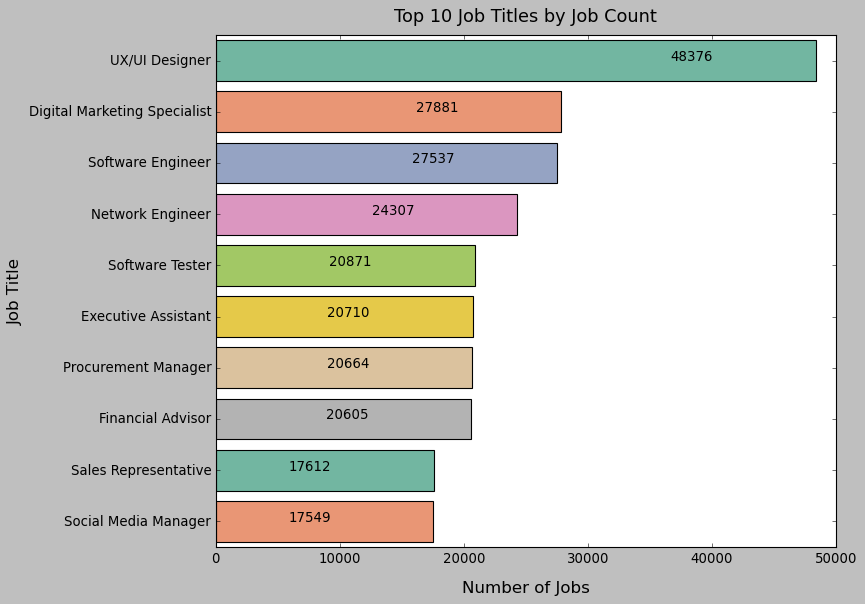

In [39]:
# Data visualization of the top ten most demanding jobs based on job openings.   

temp_df = df['Job Title'].value_counts().sort_values(ascending=False).head(10).reset_index()
temp_df.rename(columns={'index':'Job_Title_Name','Job Title':'Jobs_Count'}, inplace=True) 

plt.style.use('classic') 

plt.figure(figsize=(10,8))

graph = sns.barplot(data=temp_df, x='Jobs_Count', y='Job_Title_Name', palette='Set2') 

for index, value in temp_df['Jobs_Count'].items():
    
    plt.text(value-10000, index, str(value), fontsize=12, rotation=0, color='k', horizontalalignment='center') 

plt.title('Top 10 Job Titles by Job Count', fontsize=16, pad=12)
plt.xlabel('Number of Jobs', fontsize=15, labelpad=14)
plt.ylabel('Job Title', fontsize=15)
plt.xticks(rotation='horizontal')

plt.show() 

The visualization depicts the top ten job titles with the highest demand, reflecting the prevailing trends in the job market. UX/UI Designer stands out as the most sought-after role, with an impressive 48,376 job openings, followed by Digital Marketing Specialist and Software Engineer. This data provides valuable insights for employers, recruiters, and job seekers, offering a glimpse into emerging job trends and opportunities for career growth and development. 

In [40]:
jobs_list = df['Job Title'].value_counts().index.tolist()

role_list = [] 

for val in jobs_list:
    
    role_list.append(len(df[df['Job Title']==val]['Role'].value_counts().index.tolist())) 

Jobs_df = pd.DataFrame({'Job_Title':jobs_list,'Role_Count':role_list}) 

Jobs_df 

,Job_Title,Role_Count
0,UX/UI Designer,3
1,Digital Marketing Specialist,3
2,Software Engineer,3
3,Network Engineer,3
4,Software Tester,3
...,...,...
142,QA Engineer,1
143,Personal Assistant,1
144,Procurement Coordinator,1
145,Key Account Manager,1


In [41]:
print("\033[1m", 'There are a total of', Jobs_df[Jobs_df['Role_Count']==3].shape[0], 'Job Titles under which 3 job roles exist.')
print(' There are', Jobs_df[Jobs_df['Role_Count']==2].shape[0], 'Job Titles under which 2 job roles exist.')
print(' There are', Jobs_df[Jobs_df['Role_Count']==1].shape[0], 'Job Titles under which only 1 job role exists.') 

 There are a total of 99 Job Titles under which 3 job roles exist.
 There are 31 Job Titles under which 2 job roles exist.
 There are 17 Job Titles under which only 1 job role exists.


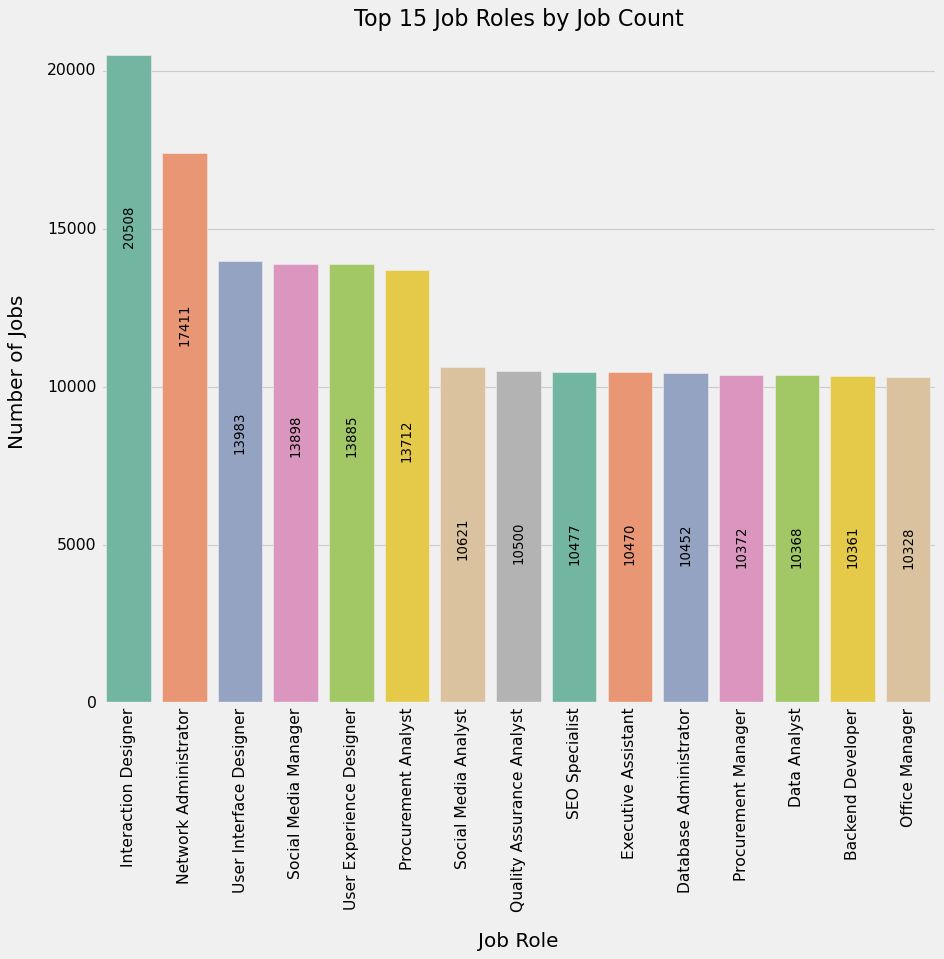

In [42]:
# Extracting the top 15 job roles by the number of job postings. 

temp_df = df['Role'].value_counts().sort_values(ascending=False).reset_index().head(15)
temp_df.rename(columns={'index':'Job_Role','Role':'Job_Count'}, inplace=True) 

# Creating bar plot.

plt.style.use('fivethirtyeight')  

plt.figure(figsize=(12,10))

graph = sns.barplot(data=temp_df, x='Job_Role', y='Job_Count', palette='Set2') 

for index, value in temp_df['Job_Count'].items():
    
    plt.text(index, value-6000, str(value), fontsize=12, rotation=90, color='k', horizontalalignment='center') 

plt.title('Top 15 Job Roles by Job Count', fontsize=20, pad=12)
plt.xlabel('Job Role', fontsize=18, labelpad=18)
plt.ylabel('Number of Jobs', fontsize=18, labelpad=18)
plt.xticks(rotation='vertical') 
plt.ylim(0, 21000)

plt.show()  

The bar chart illustrates the top 15 job roles by the number of job postings. Notably, Interaction Designer leads with over 20,000 job openings, followed by Network Administrator, User Interface Designer, and Social Media Manager, each boasting significant demand exceeding 10,000 postings. The prominence of digital design and user experience roles underscores the increasing need for professionals skilled in digital interface development and user-centric design. Noteworthy is the presence of four analyst-related roles among the top 15, indicating a growing emphasis on analytical skills and data-driven decision-making across industries. This visualization provides valuable insights into prevailing job market trends, highlighting areas of high demand and emphasizing the evolving skill sets sought after by employers. 

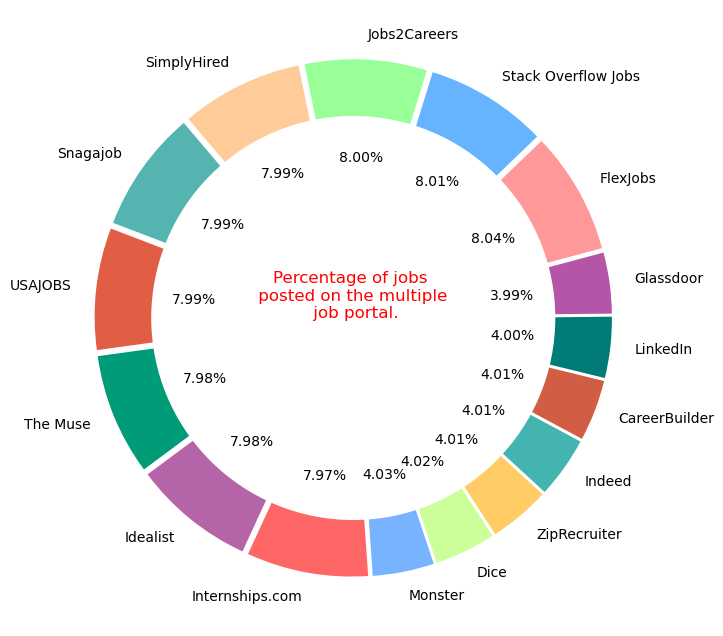

In [43]:
# Creating the pie chart.

plt.style.use('default')

temp_df = df['Job Portal'].value_counts().sort_values(ascending=False).reset_index()
temp_df.rename(columns={'index':'Job_Portal_Name','Job Portal':'Job_Posted'}, inplace=True)  

plt.figure(figsize=(8,8))

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77','#B565A7','#ff6666','#77b3ff','#ccff99','#ffcc66','#44B4B0','#D15D44','#007B77','#B555A7']
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05) 

plt.pie(temp_df['Job_Posted'], labels=temp_df['Job_Portal_Name'], autopct="%0.2f%%", colors=colors, explode=explode, startangle=15) 

centre_circle = plt.Circle((0,0),0.82,fc='white')
plt.gca().add_artist(centre_circle)

plt.annotate('Percentage of jobs \n posted on the multiple \n job portal.', color='red', xy=(0, 0), fontsize=12, ha="center") 

plt.show()

The pie chart visualizes the distribution of job postings across multiple job portals. FlexJobs leads the list with the highest number of job postings, followed closely by Stack Overflow Jobs, Jobs2Careers, and SimplyHired which is around 8%. The chart highlights the diverse platforms where job opportunities are advertised, ranging from niche portals like FlexJobs to broader platforms such as LinkedIn and Indeed. The majority of job postings are concentrated among the top few portals, indicating their significance in the online job market.  

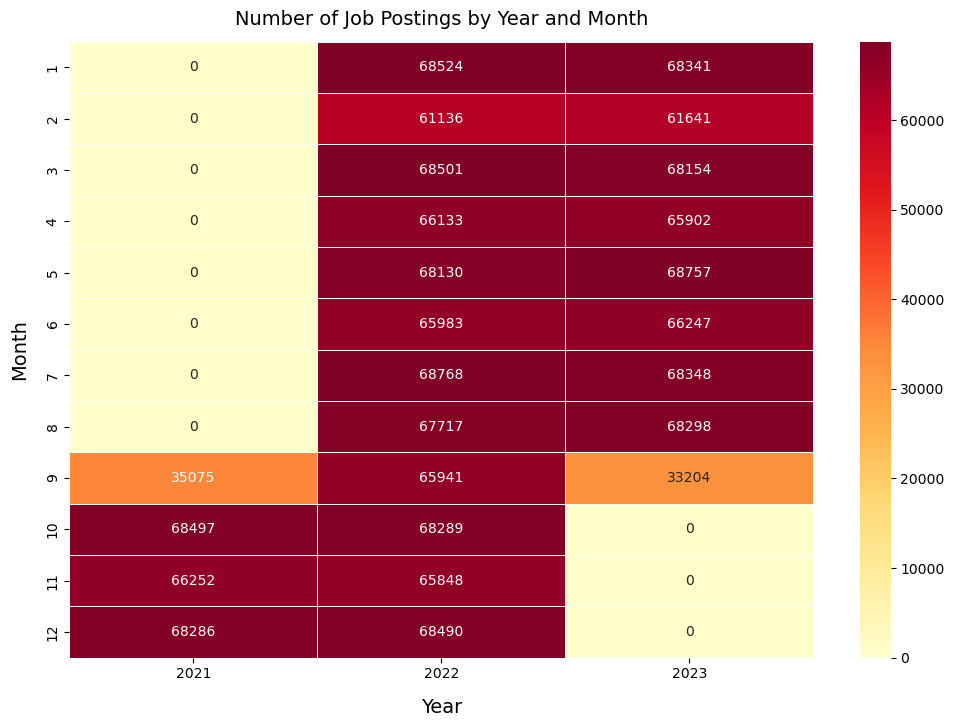

In [44]:
# Data visualization for number of jobs avaiable in each month. 

temp_df = df[['Job Posting Date']]
temp_df = temp_df.copy()

temp_df['Year'] = temp_df['Job Posting Date'].dt.year
temp_df['Month'] = temp_df['Job Posting Date'].dt.month

temp_df = temp_df.groupby(['Year', 'Month']).size().reset_index(name='Job_Count') 

temp_df = temp_df.pivot_table(index='Month', columns='Year', values='Job_Count', fill_value=0)

plt.figure(figsize=(12,8)) 

sns.heatmap(data=temp_df, annot=True, fmt='d', linewidths=0.5, cmap='YlOrRd')  

plt.title('Number of Job Postings by Year and Month', fontsize=14, pad=12)
plt.xlabel('Year', fontsize=14, labelpad=12)
plt.ylabel('Month', fontsize=14, labelpad=12)
plt.show()  

Based on this heatmap, we can observe a consistent trend in job postings over the two-year period. The job market appears to have remained relatively stable, with a consistent number of postings observed each month. There are no drastic fluctuations or significant peaks and valleys, indicating a steady demand for jobs throughout the observed timeframe. This consistency suggests a balanced job market, where employment opportunities were consistently available without significant spikes or declines. 

In [45]:
# Job posting data as per country.  

temp_df = df['Country'].value_counts().sort_values(ascending=False).reset_index()
temp_df.rename(columns={'index':'Country_Name','Country':'Job_Count'}, inplace=True) 

print('Total number of countries with jobs posting are:', temp_df.shape[0])
print()

print('Country with maximum jobs is: \n', temp_df.head(1))
print()
print('Country with minimum jobs is: \n', temp_df.tail(1))    

Total number of countries with jobs posting are: 216

Country with maximum jobs is: 
   Country_Name  Job_Count
0        Malta       7694

Country with minimum jobs is: 
     Country_Name  Job_Count
215    Lithuania       7252


Based on the above data, there are listings from a total of 216 countries, indicating a wide global reach in terms of job opportunities. Upon analysis, it's noteworthy that the country with the highest number of job postings is Malta, boasting 7694 listings. Conversely, Lithuania has the fewest job postings at 7252. The similarity between the highest and lowest numbers suggests a relatively equal distribution of job opportunities among countries, indicating a broad availability of employment opportunities across different regions. 

In [46]:
# Finding average minimum and maximum experience and salary for each job role. 

job_role_df = pd.DataFrame(columns=['Job_Role','Avg_Min_Exp','Avg_Max_Exp','Avg_Min_Sal','Avg_Max_Sal']) 

role_list = df['Role'].value_counts().index.tolist()

for val in role_list:
    
    temp_list = [] 
    
    min_exp = round(sum(df[df['Role']==val]['Min_Exp_Req'].tolist())/len(df[df['Role']==val]['Min_Exp_Req'].tolist()), 1)
    max_exp = round(sum(df[df['Role']==val]['Max_Exp_Req'].tolist())/len(df[df['Role']==val]['Max_Exp_Req'].tolist()), 1)
    min_sal = round(sum(df[df['Role']==val]['Min_Salary'].tolist())/len(df[df['Role']==val]['Min_Salary'].tolist()), 1)
    max_sal = round(sum(df[df['Role']==val]['Max_Salary'].tolist())/len(df[df['Role']==val]['Max_Salary'].tolist()), 1) 
    
    temp_list = temp_list + [val, min_exp, max_exp, min_sal, max_sal] 
    
    len_df = len(job_role_df) 
    
    job_role_df.loc[len_df] = temp_list  

job_role_df 

,Job_Role,Avg_Min_Exp,Avg_Max_Exp,Avg_Min_Sal,Avg_Max_Sal
0,Interaction Designer,2.5,11.5,60.0,105.0
1,Network Administrator,2.5,11.5,60.0,105.0
2,User Interface Designer,2.5,11.5,60.0,105.0
3,Social Media Manager,2.5,11.5,60.0,104.9
4,User Experience Designer,2.5,11.5,60.0,105.0
...,...,...,...,...,...
371,Full-Stack Developer,2.5,11.6,59.9,104.9
372,Budget Analyst,2.5,11.5,59.9,104.6
373,Clinical Nurse Manager,2.6,11.5,60.0,105.1
374,Social Science Researcher,2.5,11.5,60.0,105.1


In [47]:
print("\033[1m")
print('Based on the data, the average minimum experience required across job roles ranges from', job_role_df['Avg_Min_Exp'].min(), 'to', job_role_df['Avg_Min_Exp'].max())
print('Based on the data, the average maximum experience required across job roles ranges from', job_role_df['Avg_Max_Exp'].min(), 'to', job_role_df['Avg_Max_Exp'].max())
print('Based on the data, the average minimum salary across job roles ranges from', job_role_df['Avg_Min_Sal'].min(), 'to', job_role_df['Avg_Min_Sal'].max())
print('Based on the data, the average maximum salary across job roles ranges from', job_role_df['Avg_Max_Sal'].min(), 'to', job_role_df['Avg_Max_Sal'].max())


Based on the data, the average minimum experience required across job roles ranges from 2.4 to 2.6
Based on the data, the average maximum experience required across job roles ranges from 11.4 to 11.6
Based on the data, the average minimum salary across job roles ranges from 59.8 to 60.1
Based on the data, the average maximum salary across job roles ranges from 104.3 to 105.7


This analysis, it's evident that there are a total of 377 different job roles available. But, there is general consistency in the expectations across various job roles, indicating that the job market values a relatively uniform level of experience and compensation across different fields. (or the dataset is equally distributed) 

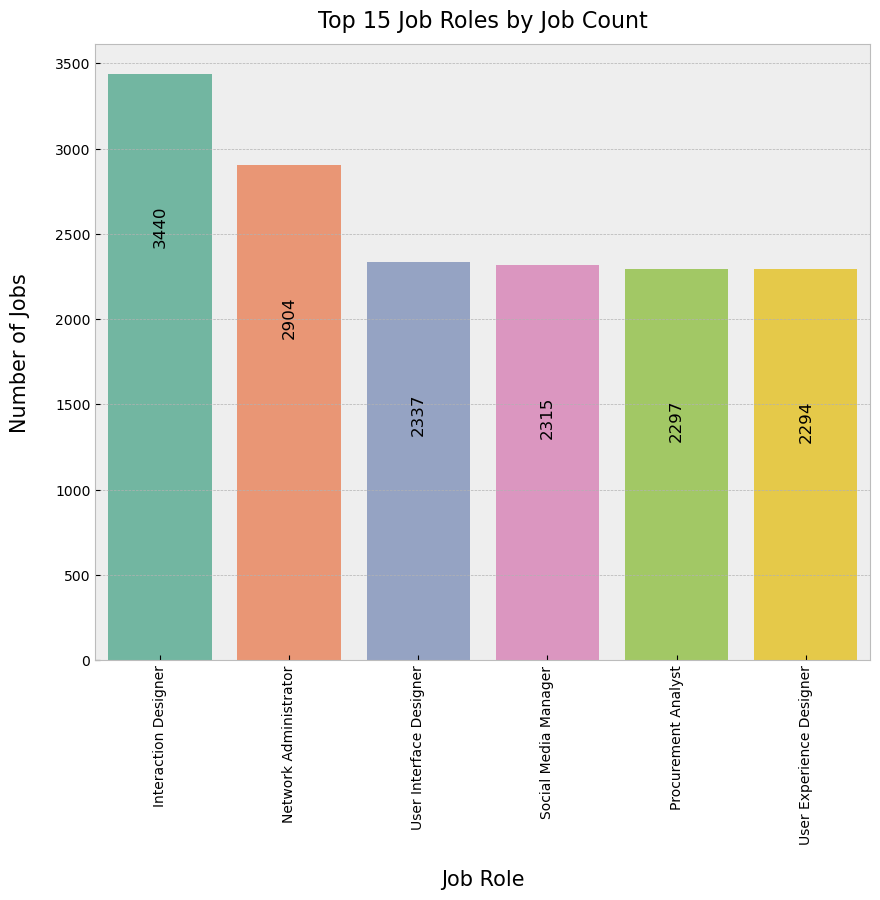

In [48]:
# Bar plot showing the top job roles that require 0 years of experience, with job counts greater than or equal to 2000.  
# It visualizes the job roles primarily aimed at hiring graduates or individuals with no prior experience. 

temp_df = df[df['Min_Exp_Req']==0]['Role'].value_counts().reset_index()
temp_df.rename(columns={'index':'Job_Role','Role':'Job_Count'}, inplace=True)
temp_df = temp_df[temp_df['Job_Count']>=2000]

# Creating bar plot.

plt.style.use('bmh')   

plt.figure(figsize=(10,8))

graph = sns.barplot(data=temp_df, x='Job_Role', y='Job_Count', palette='Set2') 

for index, value in temp_df['Job_Count'].items():
    
    plt.text(index, value-1000, str(value), fontsize=12, rotation=90, color='k', horizontalalignment='center') 

plt.title('Top 15 Job Roles by Job Count', fontsize=16, pad=12)
plt.xlabel('Job Role', fontsize=15, labelpad=18)
plt.ylabel('Number of Jobs', fontsize=15, labelpad=18)
plt.xticks(rotation='vertical') 

plt.show()  

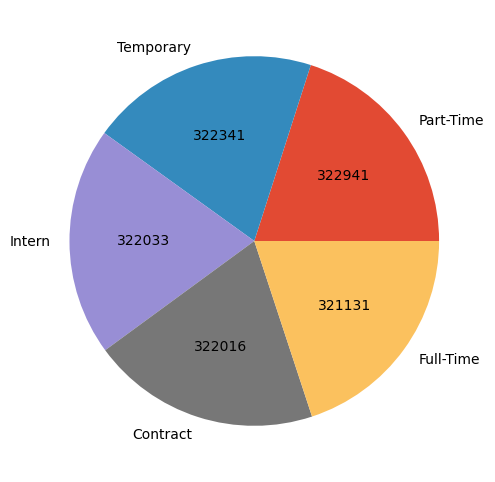

In [49]:
# Pie chart for opportunies based on work type. 

temp_df = df['Work Type'].value_counts().reset_index()
temp_df.rename(columns={'index':'Work_Type','Work Type':'Job_Count'}, inplace=True)

temp_df

plt.style.use('ggplot') 

plt.figure(figsize=(6,6))

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format 

plt.pie(temp_df['Job_Count'], labels=temp_df['Work_Type'], autopct= autopct_format(temp_df['Job_Count'])) 

plt.show()

Based on the above pie chart, it is evident that there is an equal opportunity for various types of work, including internships, part-time, full-time, contract, or temporary positions. This is indicating a balanced distribution of opportunities across different employment categories. 

### Upon analyzing the dataset, it becomes evident that the distribution of job postings remains consistent across different sectors, countries, job roles, and for each variable. Despite efforts to analyze the data sector-wise, country-wise, and based on job roles, the findings consistently reveal an evenly distributed pattern. This uniformity suggests that the data might have been aggregated from multiple sources or databases, potentially compromising its real-world accuracy and reliability. 